<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/flow_data_analysis_using_sarima_arima_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd 
from pandas import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [136]:
df=pd.read_csv('flow.csv')

In [ ]:
df.head()

In [138]:
df.tail()

,created_at,flow
60164,2022-04-12T18:10:02+00:00,1
60165,2022-04-12T18:10:18+00:00,1
60166,2022-04-12T18:10:34+00:00,1
60167,2022-04-12T18:10:50+00:00,0
60168,2022-04-12T18:11:06+00:00,0


In [139]:
df.colunms=["created_at	","flow"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,created_at,flow
0,2022-03-27T15:07:07+00:00,2
1,2022-03-27T15:07:34+00:00,1
2,2022-03-27T15:07:53+00:00,1
3,2022-03-27T15:08:24+00:00,1
4,2022-03-27T15:08:40+00:00,2


In [140]:
df.tail()

,created_at,flow
60164,2022-04-12T18:10:02+00:00,1
60165,2022-04-12T18:10:18+00:00,1
60166,2022-04-12T18:10:34+00:00,1
60167,2022-04-12T18:10:50+00:00,0
60168,2022-04-12T18:11:06+00:00,0


In [141]:
df['created_at']=pd.to_datetime(df["created_at"])

In [142]:
df.set_index("created_at",inplace=True)

In [143]:
df.head()

,flow
created_at,
2022-03-27 15:07:07+00:00,2
2022-03-27 15:07:34+00:00,1
2022-03-27 15:07:53+00:00,1
2022-03-27 15:08:24+00:00,1
2022-03-27 15:08:40+00:00,2


In [144]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
flow,60169.0,2.678888,1.525167,0.0,1.0,4.0,4.0,6.0


In [146]:
df.isnull().sum()

flow    0
dtype: int64

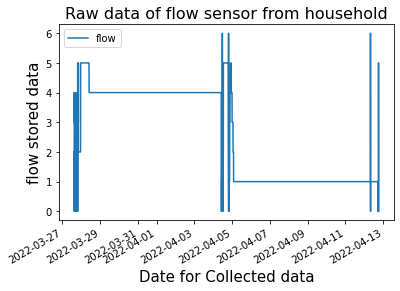

In [147]:
df.plot()
plt.title("Raw data of flow sensor from household", fontsize=16)
plt.ylabel("flow stored data", fontsize=15)
plt.xlabel("Date for Collected data", fontsize=15)
plt.show()

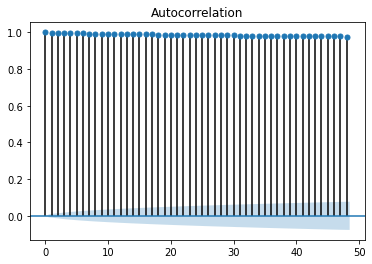

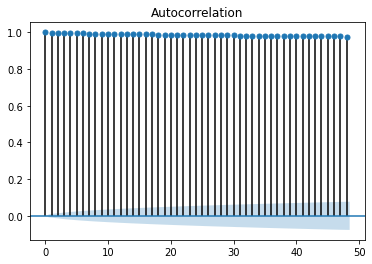

In [148]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [149]:
df.head()

,flow
created_at,
2022-03-27 15:07:07+00:00,2
2022-03-27 15:07:34+00:00,1
2022-03-27 15:07:53+00:00,1
2022-03-27 15:08:24+00:00,1
2022-03-27 15:08:40+00:00,2


In [150]:
df.shift(1)

,flow
created_at,
2022-03-27 15:07:07+00:00,NaN
2022-03-27 15:07:34+00:00,2.0
2022-03-27 15:07:53+00:00,1.0
2022-03-27 15:08:24+00:00,1.0
2022-03-27 15:08:40+00:00,1.0
...,...
2022-04-12 18:10:02+00:00,1.0
2022-04-12 18:10:18+00:00,1.0
2022-04-12 18:10:34+00:00,1.0


In [151]:
df_diff = df.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model

In [152]:
df_diff = df_diff[1:]
df_diff.head()

,flow
created_at,
2022-03-27 15:07:34+00:00,-1.0
2022-03-27 15:07:53+00:00,0.0
2022-03-27 15:08:24+00:00,0.0
2022-03-27 15:08:40+00:00,1.0
2022-03-27 15:21:48+00:00,0.0


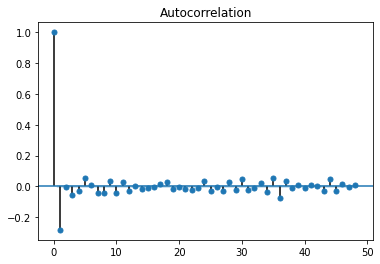

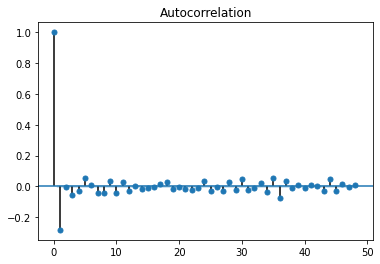

In [153]:
plot_acf(df_diff)

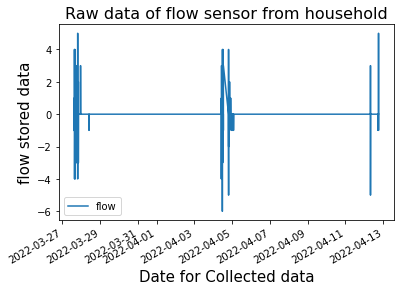

In [154]:
df_diff.plot()
plt.title("Raw data of flow sensor from household", fontsize=16)
plt.ylabel("flow stored data", fontsize=15)
plt.xlabel("Date for Collected data", fontsize=15)
plt.show()


Autoreggresive AR Model


In [155]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,df.shape)

(60169, 1)
(60139, 1) (60169, 1)


In [156]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['flow'],order=(3,1,2))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.flow   No. Observations:                60138
Model:                 ARIMA(3, 1, 2)   Log Likelihood               57851.076
Method:                       css-mle   S.D. of innovations              0.092
Date:                Wed, 22 Jun 2022   AIC                        -115688.152
Time:                        05:22:51   BIC                        -115625.122
Sample:                             1   HQIC                       -115668.576
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.722e-05      0.000     -0.106      0.915      -0.001       0.000
ar.L1.D.flow     0.4296      0.029     15.002      0.000       0.373       0.486
ar.L2.D.flow    -0.4557      0.019    -24.542      0.000      -0.492      -0.419
ar.L3.D.flow    -0.2199      0.007    -32.644      0.000      -0.233      -0.207
ma.L1.D.flow    -0.7540      0.028    -26.461      0.000      -0.810      -0.698
ma.L2.D.flow     0.5987      0.026     22.602      0.000       0.547       0.651
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5391           -1.0737j            1.2014           -0.1759
AR.2            0.5391           +1.0737j            1.2014            0.1759
AR.3           -3.1506           -0.0000j            3.1506           -0.5000
MA.1            0.6296           -1.1286j            1.2924           -0.1690
MA.2            0.6296           +1.1286j            1.2924            0.1690
-----------------------------------------------------------------------------
"""

In [178]:

predictions=model.predict(start=59000,end=60100,typ='levels').rename('ARIMA Predictions')


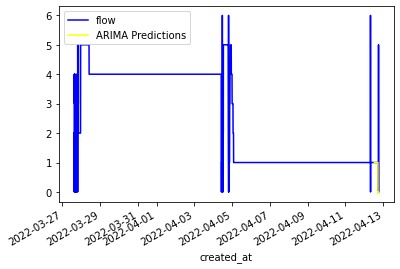

In [179]:
df.plot(legend=True, color="blue")
predictions.plot(legend=True,color='yellow')

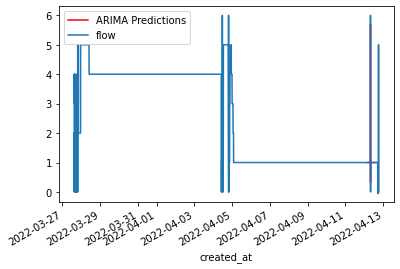

In [163]:
predictions.plot(legend=True,color='red')
df['flow'].plot(legend=True)

In [165]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['flow'].plot(legend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa690ef87a0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [166]:
mean_squared_error(test,pred)

2.234235653952971

In [169]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['flow'].mean()
rmse=sqrt(mean_squared_error(pred,test['flow']))
print(rmse)

1.4947359813535537


In [174]:
predictions = model.predict(start=59000,end=60100)

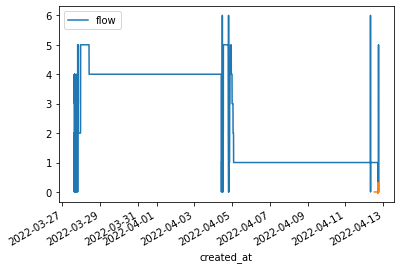

In [175]:
df.plot()
predictions.plot()

In [176]:
predictions= model.forecast(steps=1000)[0]
predictions

array([-4.01564283e-05, -6.72860353e-05, -9.45635457e-05, -1.19010922e-04,
       -1.45039610e-04, -1.73004748e-04, -2.01703449e-04, -2.29487117e-04,
       -2.56117626e-04, -2.82508444e-04, -3.09522997e-04, -3.37168283e-04,
       -3.64852984e-04, -3.92130042e-04, -4.19075334e-04, -4.46055204e-04,
       -4.73290749e-04, -5.00693319e-04, -5.28043526e-04, -5.55238904e-04,
       -5.82354908e-04, -6.09518884e-04, -6.36773683e-04, -6.64063091e-04,
       -6.91315428e-04, -7.18516099e-04, -7.45703859e-04, -7.72917768e-04,
       -8.00160154e-04, -8.27405696e-04, -8.54633867e-04, -8.81846876e-04,
       -9.09060594e-04, -9.36285345e-04, -9.63517847e-04, -9.90748494e-04,
       -1.01797239e-03, -1.04519252e-03, -1.07241452e-03, -1.09964053e-03,
       -1.12686822e-03, -1.15409442e-03, -1.18131831e-03, -1.20854153e-03,
       -1.23576583e-03, -1.26299142e-03, -1.29021721e-03, -1.31744227e-03,
       -1.34466663e-03, -1.37189099e-03, -1.39911582e-03, -1.42634102e-03,
       -1.45356615e-03, -